# Выбор локации для скважины

## Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('/datasets/geo_data_0.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [3]:
data2 = pd.read_csv('/datasets/geo_data_1.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
data3 = pd.read_csv('/datasets/geo_data_2.csv')
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [6]:
data2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
data3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
data1['id'].duplicated().sum()

10

In [9]:
data2['id'].duplicated().sum()

4

In [10]:
data3['id'].duplicated().sum()

4

In [11]:
# удалим строки с дублированными данными в колонке id
data = [data1, data2, data3]
for _ in data:
    _.drop(_.query('id.duplicated() == True').index, inplace=True)

In [12]:
data1['id'].duplicated().sum()

0

In [13]:
data2['id'].duplicated().sum()

0

In [14]:
data3['id'].duplicated().sum()

0

Исследуем гистрограмму по столбцу product

In [15]:
def product_hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[15,10])

    plt.hist(seria, bins = bins)

    plt.xlim([0, xlim_max])
    plt.ylim([0, ylim_max])

    plt.xlabel("Объем нефти на скважину, тыс. барелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

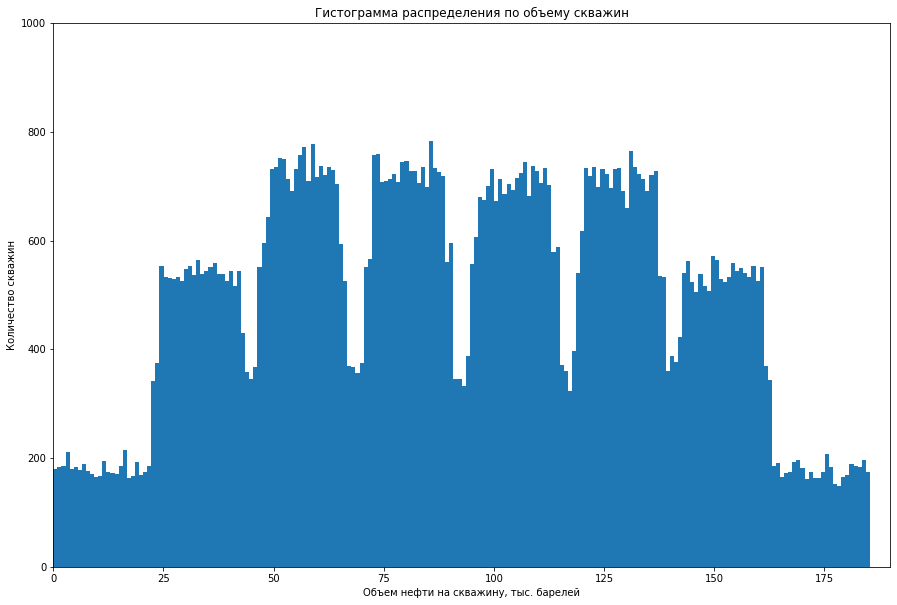

In [16]:
product_hist(data1['product'], 200, 190, 1000)

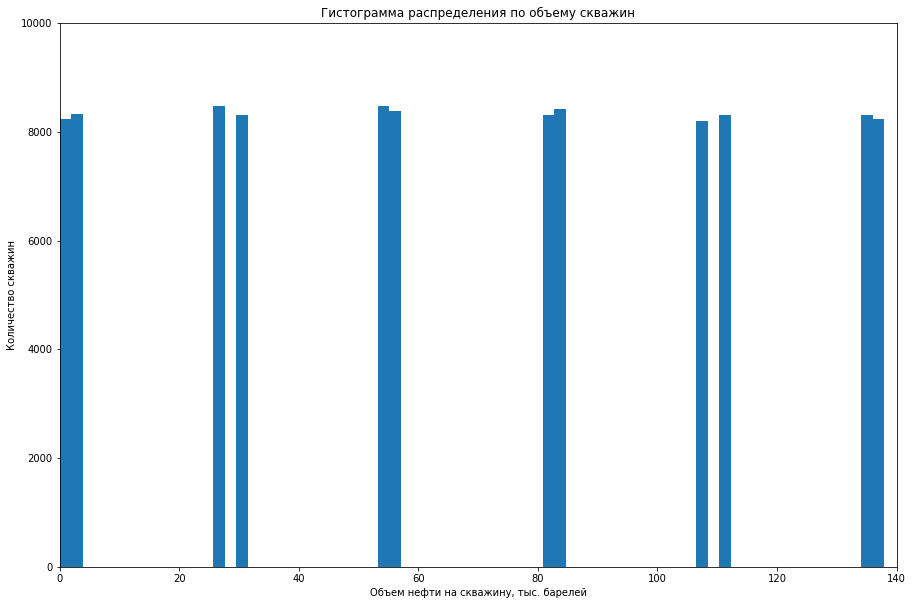

In [17]:
product_hist(data2['product'], 70, 140, 10000)

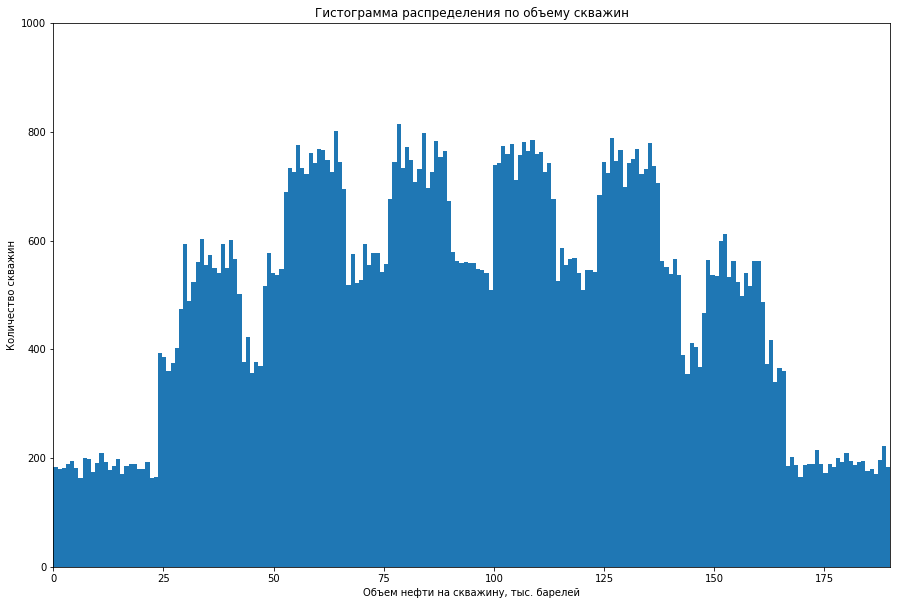

In [18]:
product_hist(data3['product'], 200, 190, 1000)

In [19]:
# Выделяем целевые и независимые признаки в регионах - признаки для модели - f0, f1, f2; целевой признак - product
# Удалим колонку id, т.к. данные в ней будут мешать дальнейшему обучению моделей
data1_X = data1.drop(['product','id'], axis = 1)
data1_y = data1['product']
data2_X = data2.drop(['product','id'], axis = 1)
data2_y = data2['product']
data3_X = data3.drop(['product','id'], axis=1)
data3_y = data3['product']

### Вывод

Данные подготовлены к обучению. Чтобы избежать ошибок, в датасетах были удалены строки с дублирующимися данными - id.
Для каждого региона определены независимые и целевые признаки.

## Обучение и проверка модели

In [20]:
# Делим все данные трёх регионов на обучающие и валидационные выборки
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(data1_X, data1_y, test_size=0.25)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(data2_X, data2_y, test_size=0.25)
features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(data3_X, data3_y, test_size=0.25)

In [21]:
# Создадим модель линейной регрессии
model = LinearRegression()

In [22]:
# Обучим модель на данных первого региона 
model.fit(features_train_1, target_train_1)
predicted1 = model.predict(features_valid_1)

In [23]:
mse_1 = mean_squared_error(target_valid_1, predicted1)

In [24]:
rmse_1 = mse_1**0.5

In [25]:
mean_1 = predicted1.mean()

In [26]:
print(f'Регион №1. Средний запас предсказанного сырья: {mean_1}')
print(f'RMSE : {rmse_1}')

Регион №1. Средний запас предсказанного сырья: 92.29201139539319
RMSE : 37.7271567804152


In [27]:
# Обучим модель на данных второго региона
model.fit(features_train_2, target_train_2)
predicted2 = model.predict(features_valid_2)

In [28]:
mse_2 = mean_squared_error(target_valid_2, predicted2)

In [29]:
rmse_2 = mse_2**0.5

In [30]:
mean_2 = predicted2.mean()

In [31]:
print(f'Регион №1. Средний запас предсказанного сырья: {mean_2}')
print(f'RMSE : {rmse_2}')

Регион №1. Средний запас предсказанного сырья: 69.18393371756476
RMSE : 0.8933997004695118


In [32]:
# Обучим модель на данных третьего региона
model.fit(features_train_3, target_train_3)
predicted3 = model.predict(features_valid_3)

In [33]:
mse_3 = mean_squared_error(target_valid_3, predicted3)

In [34]:
rmse_3 = mse_3**0.5

In [35]:
mean_3 = predicted3.mean()

In [36]:
print(f'Регион №1. Средний запас предсказанного сырья: {mean_3}')
print(f'RMSE : {rmse_3}')

Регион №1. Средний запас предсказанного сырья: 94.74375718177994
RMSE : 40.14993102751531


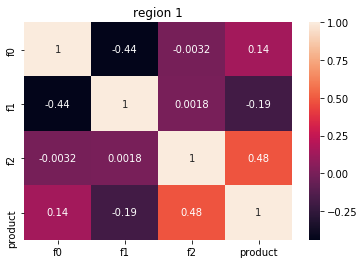

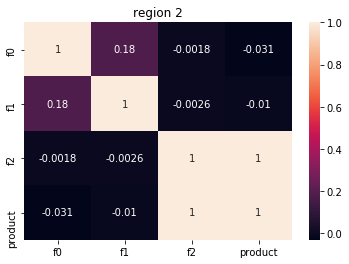

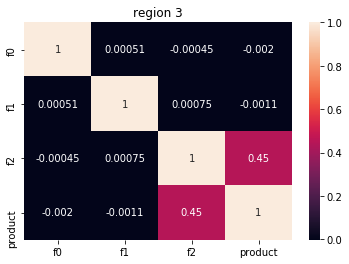

In [37]:
for i in range(len(data)):
    ax = plt.axes()
    sns.heatmap(data[i].corr(), annot = True)
    ax.set_title('region ' + str(i + 1))
    plt.show()

### Вывод

Разделили данные на две выборки - обучающую и валидационную. Далее обучили модель линейной регрессии на тенировочных данных для каждого региона. Посчитали и вывели данные по средним запасам предсказанного сырья для каждого региона и по среднеквадратичным ошибкам. Построена тепловая карта для вычисления корреляций для каждого реоигна. Наблюдаем околонуевую корреляцию между призниками по третьему региону и высокую коррелцияю между признаком f2 и целевым  во втором регионе.

## Подготовка к расчёту прибыли

In [38]:
# Из условия задачи определим переменные для расчетов
regional_budget = 10_000_000_000 # Бюджет на разработку скважин в регионе
price_for_barrel = 450  # Доход с одного барреля сырья 
income_per_unit = 450_000 # Доход с каждой единицы продукта 
best_mines = 200 # Количество лучших шахт для расчета прибыли
chosen_points = 500 # Количество исследуемых точек

In [39]:
# Посчитаем достаточный объём сырья для безубыточной разработки новой скважины
regional_development = regional_budget / income_per_unit
breakeven_volume = regional_development / best_mines
round(breakeven_volume, 2)

111.11

In [40]:
# Сравнение средних запасов предсказанного сырья в регионах по сравнению с объёмом достаточным для безубыточной разработки
means = [mean_1, mean_2, mean_3]

In [41]:
def comparing(data_volumes):
    for i in range(len(data_volumes)):
        if data_volumes[i] < breakeven_volume:
            print(f'Средний предсказанный запас сырья в регионе {i + 1} меньше объёма достаточного для безубыточной разработки на {round(breakeven_volume - data_volumes[i], 2)}')
        else:
            print(f'Средний предсказанный запас сырья в регионе {i + 1} больше объёма достаточного для безубыточной разработки на {round(data_volumes[i] - breakeven_volume, 2)}')

In [42]:
comparing(means)

Средний предсказанный запас сырья в регионе 1 меньше объёма достаточного для безубыточной разработки на 18.82
Средний предсказанный запас сырья в регионе 2 меньше объёма достаточного для безубыточной разработки на 41.93
Средний предсказанный запас сырья в регионе 3 меньше объёма достаточного для безубыточной разработки на 16.37


In [43]:
print('Средний запас фактичекой нефти на скважину в регионе 1', data1['product'].mean())
print('Средний запас фактичекой нефти на скважину в регионе 2', data2['product'].mean())
print('Средний запас фактичекой нефти на скважину в регионе 3', data3['product'].mean())

Средний запас фактичекой нефти на скважину в регионе 1 92.49968421774354
Средний запас фактичекой нефти на скважину в регионе 2 68.82391591804064
Средний запас фактичекой нефти на скважину в регионе 3 94.99834211933378


### Вывод

Определили переменные для дальнейших рачсетов (из условия задачи). Посчитано значение необходимого количества сырья для безубыточной разработки новой скважины (111.11 баррелей). Среднее значенеи запасов во всех регионах меньше необходимого количества для б/у разработки, при этом максимально близкое значение в третьем регоине , а меньше всего полуилось во втором регионе. 

## Расчёт прибыли и рисков 

In [44]:
# Функция для расчета прибыли по выбранным скважинам и предсказаниям модели
def revenue(target, predictions):
    target = pd.Series(target).reset_index(drop = True)
    predictions = pd.Series(predictions).reset_index(drop = True)
    predictions_ = predictions.sort_values(ascending = False)[:best_mines].index
    selected = target[predictions_]
    revenue = selected.sum() * income_per_unit - regional_budget
    return round(revenue, 2)

In [45]:
revenue(target_valid_1, predicted1)

3203598181.97

In [46]:
revenue(target_valid_2, predicted2)

2415086696.68

In [47]:
revenue(target_valid_3, predicted3)

2440996517.88

In [48]:
def bootstrap(target, probabilities, iterations, sample_size):
    state = np.random.RandomState(12345)
    values = []
    for i in range(iterations):
        target_subsample = target.sample(n = sample_size, random_state = state, replace = True)
        p_subsample = probabilities[target_subsample.index]
        values.append(revenue(target_subsample, p_subsample))

    values = pd.Series(values)
    mean = values.mean()
    risk = (values < 0).mean()
    confidence_interval = st.t.interval(0.95, len(values)-1, loc = values.mean(), scale = values.sem())    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    quantile_interval = (lower, upper)
    return round(mean, 2), confidence_interval, round(risk*100, 2), quantile_interval

In [49]:
mean_1, interval_1, risk_1, quantile_1 = bootstrap(target_valid_1.reset_index(drop = True), predicted1, 1000, 500)
print('Регион №1 средняя выручка = ', mean_1)
print('Регион №1 95 %ый доверительный интервал по стьюденту = ', interval_1)
print('Регион №1 95 %ый доверительный интервал по квантилям = ', quantile_1)
print(f'Регион №1 Риск убытков: {risk_1}%')

Регион №1 средняя выручка =  409492220.33
Регион №1 95 %ый доверительный интервал по стьюденту =  (393271421.7472229, 425713018.91819704)
Регион №1 95 %ый доверительный интервал по квантилям =  (-110162238.53349999, 946228593.003)
Регион №1 Риск убытков: 6.0%


In [50]:
mean_2, interval_2, risk_2, quantile_2 = bootstrap(target_valid_2.reset_index(drop = True), predicted2, 1000, 500)
print('Регион №1 средняя выручка = ', mean_2)
print('Регион №1 95 %ый доверительный интервал по стьюденту = ', interval_2)
print('Регион №1 95 %ый доверительный интервал по квантилям = ', quantile_2)
print(f'Регион №1 Риск убытков: {risk_2}%')

Регион №1 средняя выручка =  481916504.39
Регион №1 95 %ый доверительный интервал по стьюденту =  (469872283.65350777, 493960725.1204322)
Регион №1 95 %ый доверительный интервал по квантилям =  (102398935.436, 850930387.51225)
Регион №1 Риск убытков: 0.6%


In [51]:
mean_3, interval_3, risk_3, quantile_3 = bootstrap(target_valid_3.reset_index(drop = True), predicted3, 1000, 500)
print('Регион №1 средняя выручка = ', mean_3)
print('Регион №1 95 %ый доверительный интервал по стьюденту = ', interval_3)
print('Регион №1 95 %ый доверительный интервал по квантилям = ', quantile_3)
print(f'Регион №1 Риск убытков: {risk_3}%')

Регион №1 средняя выручка =  377626212.21
Регион №1 95 %ый доверительный интервал по стьюденту =  (362123143.3022598, 393129281.12062025)
Регион №1 95 %ый доверительный интервал по квантилям =  (-154604945.68725, 853908029.0822499)
Регион №1 Риск убытков: 6.8%


### Вывод

Второй регион получился одним из лучших по показателям предсказывания - в данном регионе самые высокие показатели средней выручки и 95%-ного доверительного интервала и самый низкий риск убытков, в тоже время данные не распределены по нормальному закону. 